In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/Desktop/Data Science/Desafio Codenation/train.csv')

In [3]:
x_raw = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']]
y_raw = df['NU_NOTA_MT']

In [4]:
df = pd.concat([x_raw,y_raw], join='outer', axis=1).dropna(axis=0)
df = df[(df != 0).all(1)]

In [5]:
X = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',]]
Y = df['NU_NOTA_MT']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=None) 


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
modelo = LinearRegression()
modelo.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print('R²: {}'.format(modelo.score(X_train,Y_train).round(3)))

R²: 0.395


In [10]:
y_previsto = modelo.predict(X_test)
y_previsto

array([466.51759345, 492.99732839, 379.92570604, ..., 573.60225697,
       446.01856526, 435.70361032])

In [11]:
print(np.std((y_previsto - Y_test)**2))

from sklearn import metrics
print('R²: %s' % metrics.r2_score(Y_test, y_previsto).round(3))

8336.530735444092
R²: 0.435


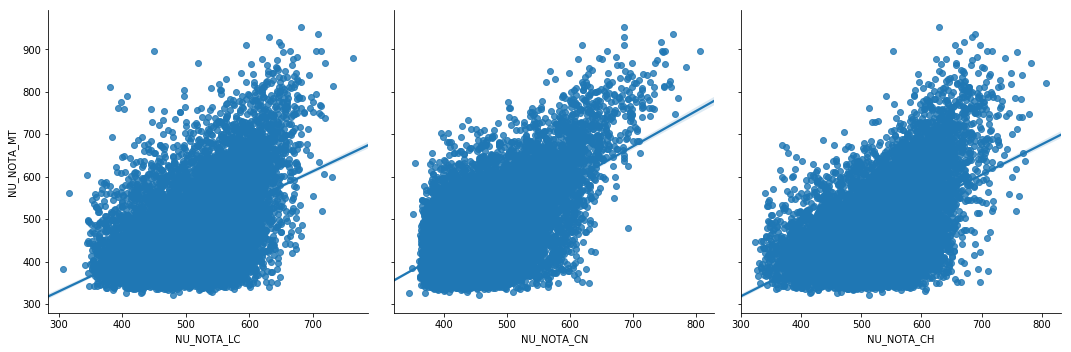

In [12]:
sns.pairplot(x_vars=['NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH'], y_vars='NU_NOTA_MT', data=df, 
                 kind='reg', height=5)

Pode-se ver uma correlação das variáveis com o que se deseja, mas talvez não seja uma relação linear

In [13]:
import statsmodels.api as sm 

X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(Y_train, X_train, hasconst=True).fit()

In [14]:
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2621.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:36:59   Log-Likelihood:                -46464.
No. Observations:                8067   AIC:                         9.293e+04
Df Residuals:                    8064   BIC:                         9.296e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NU_NOTA_CN     0.5356      0.015     35.374      0.0

# Transformação logarítmica

Tentativa de ajustar a curva tirando o logarítmo de cada variável

In [15]:
df['log_NU_NOTA_CN'] = np.log(df['NU_NOTA_CN']+1.0)
df['log_NU_NOTA_CH'] = np.log(df['NU_NOTA_CH']+1.0)
df['log_NU_NOTA_LC'] = np.log(df['NU_NOTA_LC']+1.0)
df['log_NU_NOTA_MT'] = np.log(df['NU_NOTA_MT']+1.0)

x_raw = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','log_NU_NOTA_CN', 'log_NU_NOTA_CH', 'log_NU_NOTA_LC']]
y_raw = df[['NU_NOTA_MT','log_NU_NOTA_MT']]

In [16]:
df = pd.concat([x_raw,y_raw], join='outer', axis=1).dropna(axis=0)
df = df[(df != 0).all(1)]

Primeiro tirando o logarítmo das variáveis X

In [17]:
X = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',]]
Y = df['log_NU_NOTA_MT']

In [18]:
Y.head(), X.head()

(0    5.992464
 1    6.132964
 5    5.901266
 6    6.273254
 7    6.341593
 Name: log_NU_NOTA_MT, dtype: float64,    NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC
 0       436.3       495.4       581.2
 1       474.5       544.1       599.0
 5       439.7       583.2       410.9
 6       420.1       604.2       484.5
 7       619.6       625.8       611.2)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=None) 

In [20]:
Y_train.head(), X_train.head()

(9554     5.987205
 6001     6.368702
 10250    6.211604
 2940     6.396930
 10458    6.239301
 Name: log_NU_NOTA_MT, dtype: float64,
        NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC
 9554        497.4       522.6       587.1
 6001        476.6       486.4       518.1
 10250       519.4       492.1       549.5
 2940        572.2       644.0       588.4
 10458       428.3       547.1       529.8)

In [21]:
modelo.fit(X_train,Y_train)
print('R²: {}'.format(modelo.score(X_train,Y_train).round(3)))

R²: 0.371


In [22]:
y_previsto = modelo.predict(X_test)

print(np.std((np.exp(y_previsto) - np.exp(Y_test))**2))

from sklearn import metrics
print('R²: %s' % metrics.r2_score(Y_test, y_previsto).round(3))

8945.603237897858
R²: 0.402


In [23]:
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2621.
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:37:00   Log-Likelihood:                -46464.
No. Observations:                8067   AIC:                         9.293e+04
Df Residuals:                    8064   BIC:                         9.296e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NU_NOTA_CN     0.5356      0.015     35.374      0.000       0.506       0.565
NU_NOTA_CH     0.2703      0.017     15.555      0.000       0.236       0.304
NU_NOTA_LC     0.1654      0.017      9.755      0.000       0.132       0.199
==============================================================================
Omnibus:                      151.571   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.775
Skew:                           0.343   Prob(JB):                     2.02e-35
Kurtosis:                       3.077   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Simplesmente transformar os dados para logarítmo não resolveu o problema

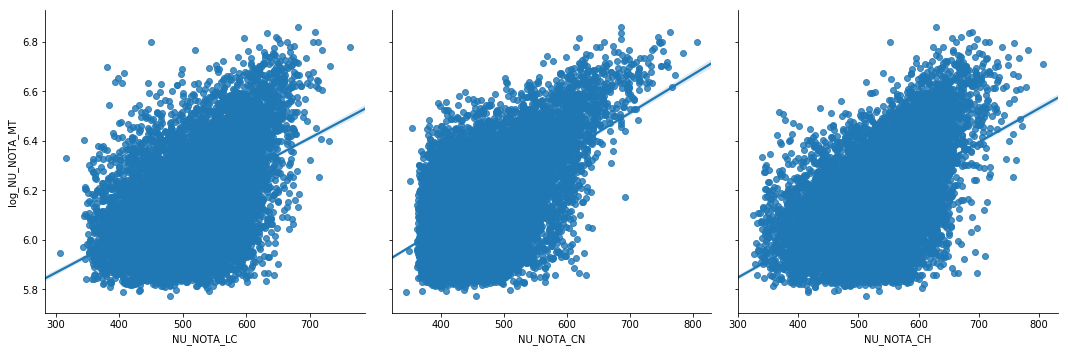

In [24]:
sns.pairplot(x_vars=['NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH'], y_vars='log_NU_NOTA_MT', data=df, 
                 kind='reg', height=5)

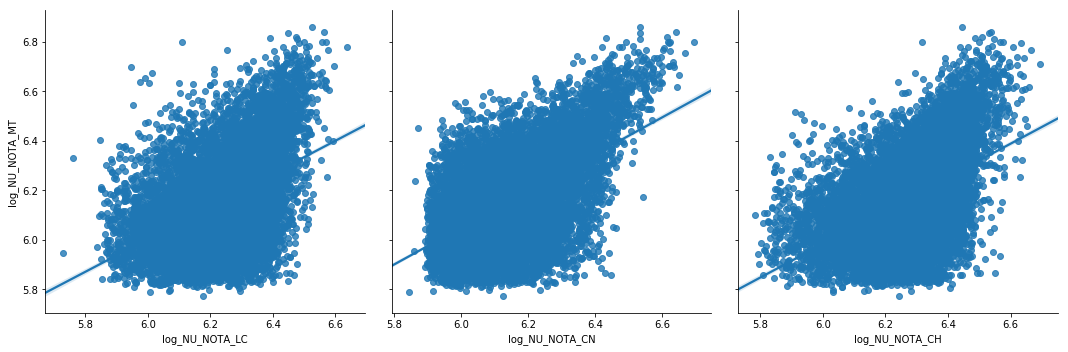

In [25]:
sns.pairplot(x_vars=['log_NU_NOTA_LC','log_NU_NOTA_CN','log_NU_NOTA_CH'], y_vars='log_NU_NOTA_MT', data=df, 
                 kind='reg', height=5)

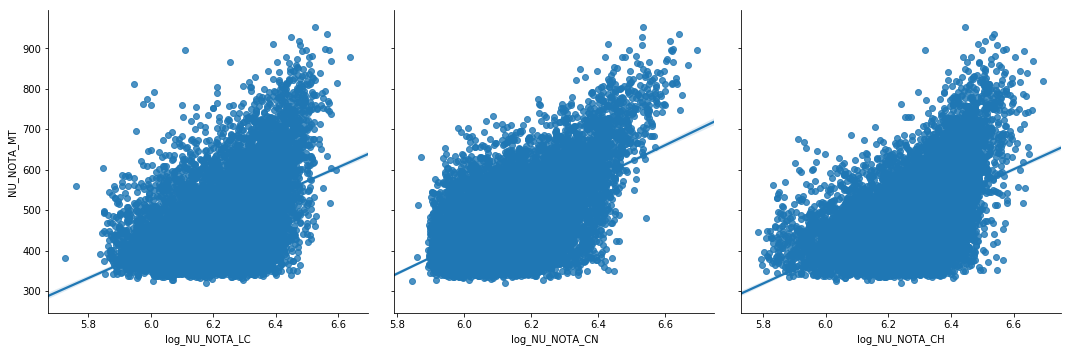

In [26]:
sns.pairplot(x_vars=['log_NU_NOTA_LC','log_NU_NOTA_CN','log_NU_NOTA_CH'], y_vars='NU_NOTA_MT', data=df, 
                 kind='reg', height=5)

# Testando com função polinomial

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)

In [28]:
X_poly = poly_reg.fit_transform(X_train)

In [29]:
modelo = LinearRegression()
modelo.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
X_poly2 = poly_reg.fit_transform(X_test)

In [31]:
y_previsto2 = modelo.predict(X_poly2)

In [32]:
from sklearn.metrics import r2_score
print('R²: {}'.format(r2_score(Y_test,y_previsto2).round(3)))

R²: -1.179


In [33]:
import pandas as pd
df = pd.read_csv('~/Desktop/Data Science/Desafio Codenation/train.csv')

In [34]:
x1 = df[['NU_IDADE','TP_COR_RACA','CO_UF_RESIDENCIA']]
y1 = df['NU_NOTA_MT']

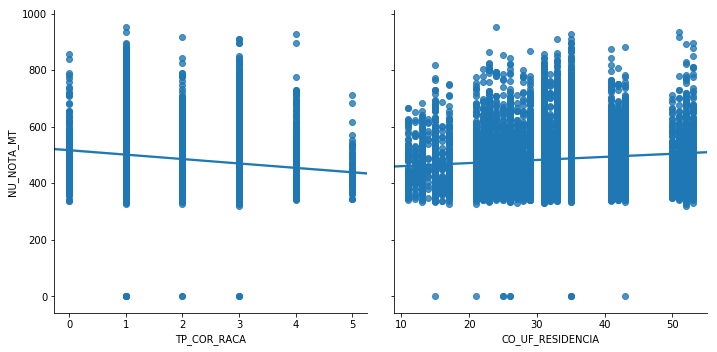

In [35]:
sns.pairplot(x_vars=['TP_COR_RACA','CO_UF_RESIDENCIA'], y_vars='NU_NOTA_MT', data=df, 
                 kind='reg', height=5)

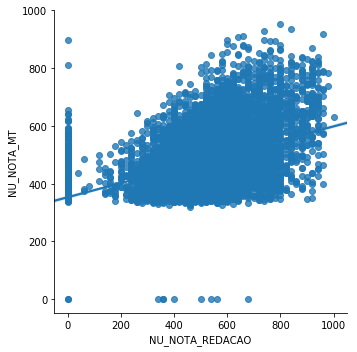

In [36]:
sns.pairplot(x_vars=['NU_NOTA_REDACAO'], y_vars='NU_NOTA_MT', data=df, 
                 kind='reg', height=5)